**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
ASSAY   = "LentiMPRA_K562_Nadav"
FOLDER  = "coverage"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER)
fname = "description.vikram230621.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_cnames = dat
print(dim(dat))
dat

[1] 15  2


Name,Description
<chr>,<chr>
Chrom,Chromosome
Start,Start position
End,End position
Name,Site name
Score,Score (NULL)
Strand,Strand
Category,Site property (potential enhancer/promoter or postive/negative controls)
Log2FC_Rep1,Log2FoldChange of replicate 1
Log2FC_Rep2,Log2FoldChange of replicate 2


In [3]:
ASSAY   = "LentiMPRA_K562_Nadav"
FOLDER  = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER)
fname = "K562.vikram230621.LMPRA.stranded.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c(
    "Chrom_Peak", "Start_Peak", "End_Peak",
    dat_cnames$Name,
    "Overlap"
)
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

dat_peak_score_import = dat
print(dim(dat))
head(dat)

[1] 170187     19


Chrom_Peak,Start_Peak,End_Peak,Chrom,Start,End,Name,Score,Strand,Category,Log2FC_Rep1,Log2FC_Rep2,Log2FC_Rep3,Log2FC_Mean,ZScore_Rep1,ZScore_Rep2,ZScore_Rep3,ZScore_Mean,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,115411,115986,chr1,115631,115831,peak1_Reversed:,0,-,potential enhancer,0.138,-0.044,0.025,0.040,2.4069026,1.7461277,1.9966413,2.05110076,200
chr1,137737,139544,chr1,138940,139140,peak2_Reversed:,0,-,potential enhancer,-0.370,0.330,-0.261,-0.101,0.5625420,3.1039838,0.9582808,1.53918178,200
chr1,137737,139544,chr1,138940,139140,peak2,0,+,potential enhancer,-0.245,-0.609,-0.775,-0.543,1.0163709,-0.3051788,-0.9078635,-0.06555714,200
chr1,267853,268603,chr1,267911,268111,peak4_Reversed:,0,-,potential enhancer,-0.438,-1.087,-1.375,-0.967,0.3156591,-2.0406204,-3.0862422,-1.60494471,200
chr1,267853,268603,chr1,267911,268111,peak4,0,+,potential enhancer,0.220,0.302,0.152,0.225,2.7046143,3.0023261,2.4577314,2.72276750,200
chr1,777949,779437,chr1,778638,778838,peak11,0,+,potential enhancer,0.879,1.408,0.581,0.956,5.0972002,7.0178040,4.0152722,5.37675880,200


**Check results**

In [4]:
### overlap should be all one
table(dat_peak_score_import$Overlap)


     1      2      3      4      5      6      7      8      9     10     11 
    20     23     22     18     19     18     22     18     22     20     12 
    12     13     14     15     16     17     18     19     20     21     22 
    13     20     18     14     15     12     16     20     13     23     16 
    23     24     25     26     27     28     29     30     31     32     33 
    15     24     16     22     18     24     24     29     18     30     18 
    34     35     36     37     38     39     40     41     42     43     44 
    31     24     20     20     28     27     18     19     29     22     31 
    45     46     47     48     49     50     51     52     53     54     55 
    35     21     30     17     37     33     34     28     36     30     16 
    56     57     58     59     60     61     62     63     64     65     66 
    26     27     36     32     40     43     29     48     47     39     34 
    67     68     69     70     71     72     73     74     75 

## Arrange

In [7]:
dat = dat_peak_score_import
dat = dat %>% 
    dplyr::mutate(
        Peak  = paste0(Chrom_Peak, ":", Start_Peak, "-", End_Peak),
        Site  = paste0(Chrom, ":", Start, "-", End, "|", Category),
        Score = ZScore_Mean
    ) %>%
    dplyr::select(
        Peak, Site, Score
    )

###
dat_peak_score_arrange = dat
print(dim(dat))
head(dat)

[1] 170187      3


Peak,Site,Score
<chr>,<chr>,<dbl>
chr1:115411-115986,chr1:115631-115831|potential enhancer,2.05110076
chr1:137737-139544,chr1:138940-139140|potential enhancer,1.53918178
chr1:137737-139544,chr1:138940-139140|potential enhancer,-0.06555714
chr1:267853-268603,chr1:267911-268111|potential enhancer,-1.60494471
chr1:267853-268603,chr1:267911-268111|potential enhancer,2.72276750
chr1:777949-779437,chr1:778638-778838|potential enhancer,5.37675880


## Summary

In [8]:
###
dat = dat_peak_score_arrange
dat = dat %>% dplyr::mutate(Sign  = ifelse(Score > 0, "pos", "neg"))
table(dat$Sign)


   neg    pos 
 32664 137523 

In [9]:
###
dat = dat_peak_score_arrange
dat = dat %>% dplyr::mutate(Sign  = ifelse(Score > 0, "pos", "neg"))

###
dat_summary_total = dat %>%
    dplyr::group_by(Peak) %>%
    dplyr::summarise(
        Mean    = mean(Score),
        Median  = median(Score),
        Max     = max(Score),
        Min     = min(Score),
        Count   = n(),
        .groups = "drop"
    )

###
dat_summary_sign = dat %>%
    dplyr::group_by(Peak, Sign) %>%
    dplyr::summarise(Mean = mean(Score), .groups = "drop") %>% 
    dplyr::mutate(Sign = dplyr::recode(Sign, `pos` = "Mean_Pos", `neg` = "Mean_Neg")) %>% 
    tidyr::spread(Sign, Mean)

###
dat = dplyr::left_join(
    dat_summary_total,
    dat_summary_sign,
    by = c("Peak")) %>% 
    replace(is.na(.), 0)

dat_peak_score_summary = dat
print(dim(dat))
head(dat)

[1] 68420     8


Peak,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
chr10:100045961-100046653,1.35946554,1.35946554,1.4810917,1.23783940,2,0.0000000,1.3594655
chr10:100065094-100065486,1.07264569,1.07264569,1.3503890,0.79490241,2,0.0000000,1.0726457
chr10:100081317-100081607,0.08511404,0.08511404,0.7150285,-0.54480044,2,-0.5448004,0.7150285
chr10:100129051-100131059,0.21944739,0.21944739,0.2611997,0.17769514,2,0.0000000,0.2194474
chr10:100185017-100187275,0.59521771,0.59521771,1.1724880,0.01794737,2,0.0000000,0.5952177
chr10:100228452-100230090,5.54013719,5.54013719,6.0266418,5.05363263,2,0.0000000,5.5401372


In [10]:
dat = dat_peak_score_summary
summary(dat$Count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.487   2.000  24.000 

In [11]:
dat = dat_peak_score_summary
table(dat$Count)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
 1393 52985   532 10572   205  2133    62   387    14   106     6    17     3 
   14    16    22    24 
    1     2     1     1 

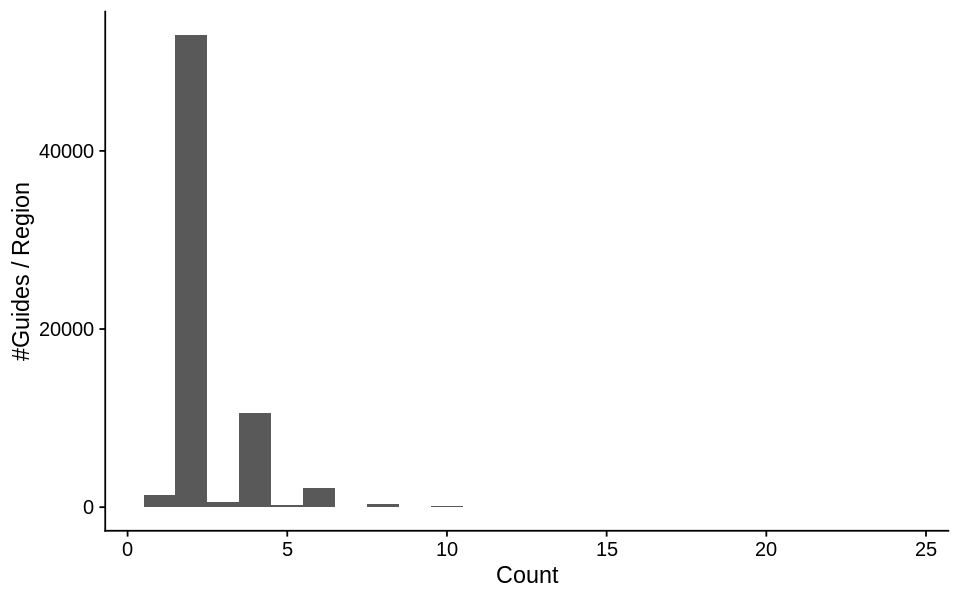

In [12]:
dat = dat_peak_score_summary
gpt = ggplot(dat, aes(x=Count)) + 
    geom_histogram(binwidth = 1) + 
    labs(y="#Guides / Region") +
    theme_cowplot()
options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

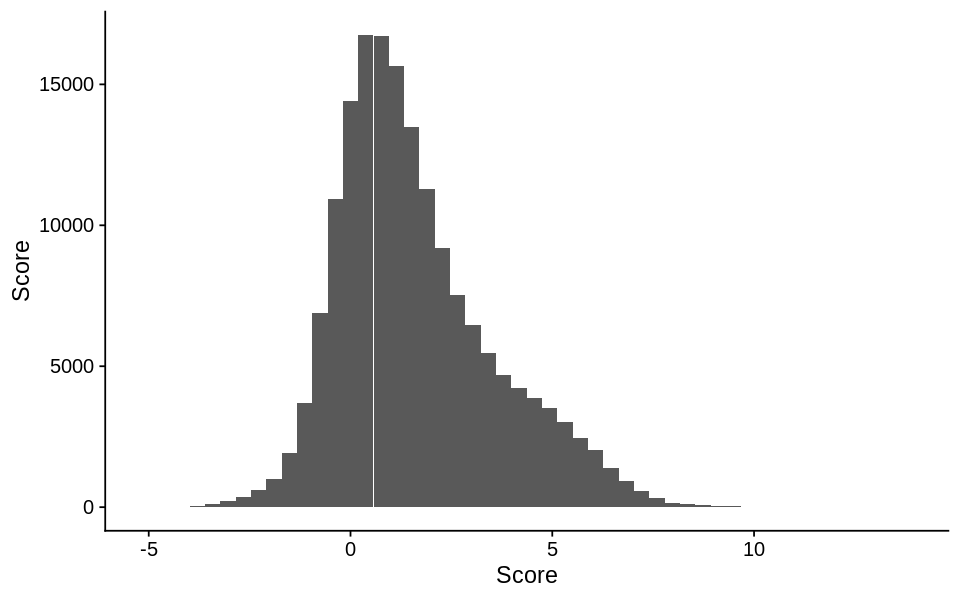

In [13]:
dat = dat_peak_score_arrange
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(bins = 50) + 
    labs(y="Score") +
    theme_cowplot()
print(gpt)

## Save results

In [14]:
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "results.score.vikram230621.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_score_arrange
write_tsv(dat, fpath)

In [15]:
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "results.summary.vikram230621.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_score_summary
write_tsv(dat, fpath)